In [5]:
#  Uvod in vplejava datoteke

In [6]:
# naložimo paket
import pandas as pd
import os.path
import re

# ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 10 vrstic
pd.options.display.max_rows = 10

# izberemo interaktivni "notebook" stil risanja
%matplotlib inline
# naložimo razpredelnico, s katero bomo delali
pot_do_anime = os.path.join("anime.csv")
anime = pd.read_csv(pot_do_anime)
zanri = pd.read_csv("zanri.csv")

In [7]:
# analizo bomo locili na dva dela, in sicer na animeje, s koncem in tiste, ki se vedno prihajajo

In [8]:
airing = anime[anime["status"] == "Currently Airing"]
finished = anime[anime["status"] == "Finished Airing"]

finished

,name,id,episodes,status,aired,studio,source,rating,score,finished airing,year,season
0,Cowboy Bebop,1,26.0,Finished Airing,"Apr 3, 1998",Sunrise,Original,R - 17+ (violence & profanity),8.79,"Apr 24, 1999",1998.0,Spring
1,Cowboy Bebop: Tengoku no Tobira (Cowboy Bebop:...,5,1.0,Finished Airing,"Sep 1, 2001",Bones,Original,R - 17+ (violence & profanity),8.39,NaN,2001.0,Summer
2,Trigun,6,26.0,Finished Airing,"Apr 1, 1998",Madhouse,Manga,PG-13 - Teens 13 or older,8.24,"Sep 30, 1998",1998.0,Spring
3,Witch Hunter Robin,7,26.0,Finished Airing,"Jul 2, 2002",Sunrise,Original,PG-13 - Teens 13 or older,7.28,"Dec 24, 2002",2002.0,Summer
4,Bouken Ou Beet (Beet the Vandel Buster),8,52.0,Finished Airing,"Sep 30, 2004",Toei Animation,Manga,PG - Children,6.98,"Sep 29, 2005",2004.0,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...
17277,Words Worth Omake,43016,1.0,Finished Airing,"Dec 18, 2009",NaN,Visual novel,Rx - Hentai,NaN,NaN,2009.0,Fall
17278,Cyber Weapon Z aka(?),43019,1.0,Finished Airing,NaN,NaN,Manga,None,NaN,NaN,NaN,NaN
17279,CYaZALEA☆Kiss☆DADANDAAAN,43041,1.0,Finished Airing,"May 8, 2020",NaN,Other,PG-13 - Teens 13 or older,NaN,NaN,2020.0,Spring
17280,Yami Yami (September 2012),43043,1.0,Finished Airing,"Sep 26, 2012",NaN,Original,G - All Ages,NaN,NaN,2012.0,Summer


In [9]:
airing

,name,id,episodes,status,aired,studio,source,rating,score,finished airing,year,season
11,One Piece,21,NaN,Currently Airing,"Oct 20, 1999",Toei Animation,Manga,PG-13 - Teens 13 or older,8.49,"1999 to, ?",1999.0,Fall
211,Detective Conan (Case Closed),235,NaN,Currently Airing,"Jan 8, 1996",TMS Entertainment,Manga,PG-13 - Teens 13 or older,8.17,"1996 to, ?",1996.0,Winter
871,Crayon Shin-chan (Shin Chan),966,NaN,Currently Airing,"Apr 13, 1992",Shin-Ei Animation,Manga,PG - Children,7.69,"1992 to, ?",1992.0,Spring
1093,Nintama Rantarou,1199,NaN,Currently Airing,"Apr 10, 1993",Ajia-Do,Manga,G - All Ages,7.07,"1993 to, ?",1993.0,Spring
1782,Sore Ike! Anpanman,1960,NaN,Currently Airing,"Oct 3, 1988",TMS Entertainment,Picture book,PG - Children,6.45,"1988 to, ?",1988.0,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...
17251,Fei Zhi Baike,42967,12.0,Currently Airing,"Oct 22, 2020",NaN,Manga,PG - Children,NaN,"2020 to, ?",2020.0,Fall
17252,Menghuan Shuyuan 4th Season,42969,14.0,Currently Airing,"Oct 12, 2020",Painting Dream,Game,None,NaN,"2020 to, ?",2020.0,Fall
17256,Douluo Dalu: Zhi Xingdou Xian Ji Pian,42977,NaN,Currently Airing,"Aug 22, 2020",NaN,Novel,PG-13 - Teens 13 or older,NaN,"2020 to, ?",2020.0,Summer
17269,Awajishima no Shichifukujin (Seven Lucky Gods),42998,NaN,Currently Airing,"Oct 5, 2020",NaN,Original,G - All Ages,NaN,"2020 to, ?",2020.0,Fall


In [10]:
zanri

,id,genre
0,1,Action
1,1,Adventure
2,1,Comedy
3,1,Drama
4,1,Sci-Fi
...,...,...
45482,43041,Music
45483,43041,Parody
45484,43043,Music
45485,43044,Romance


<AxesSubplot:xlabel='source'>

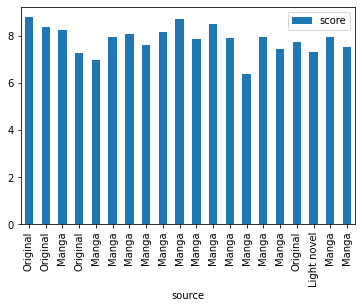

In [11]:
anime[anime["source"] != "Unknown"].head(20).plot.bar(y="score", x="source")

In [12]:
anime[anime["episodes"] > 500]

,name,id,episodes,status,aired,studio,source,rating,score,finished airing,year,season
2259,Doraemon (1979) (Doraemon),2471,1787.0,Finished Airing,"Apr 2, 1979",Shin-Ei Animation,Manga,PG - Children,7.69,"Mar 18, 2005",1979.0,Spring
3866,Ninja Hattori-kun,4936,694.0,Finished Airing,"Sep 28, 1981",Shin-Ei Animation,Manga,G - All Ages,6.84,"Dec 25, 1987",1981.0,Summer
4508,Manga Nippon Mukashibanashi (1976),6277,1471.0,Finished Airing,"Jan 7, 1976",Group TAC,Unknown,G - All Ages,6.05,"Sep 3, 1994",1976.0,Winter
5168,Obake no Q-tarou (1985),7981,510.0,Finished Airing,"Apr 1, 1985",NaN,Unknown,G - All Ages,NaN,"Mar 29, 1987",1985.0,Spring
5247,Hoka Hoka Kazoku (The Affectuous Family),8213,1428.0,Finished Airing,"Oct 1, 1976",Eiken,Unknown,G - All Ages,5.78,"Mar 31, 1982",1976.0,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...
8168,Kotowaza House,20117,773.0,Finished Airing,"Apr 4, 1987",Eiken,Unknown,None,NaN,"Sep 28, 1994",1987.0,Spring
8558,Monoshiri Daigaku: Ashita no Calendar,22221,1274.0,Finished Airing,"Jul 1, 1966",NaN,Original,G - All Ages,NaN,"Aug 2, 1970",1966.0,Summer
8832,Kirin Monoshiri Yakata,23349,1565.0,Finished Airing,"Jan 1, 1975",NaN,Unknown,PG - Children,5.82,"Dec 31, 1979",1975.0,Winter
11214,Kirin Ashita no Calendar,32448,1306.0,Finished Airing,"Jan 1, 1980",NaN,Unknown,G - All Ages,NaN,"Oct 6, 1984",1980.0,Winter


In [13]:
airing.sort_values("score")

,name,id,episodes,status,aired,studio,source,rating,score,finished airing,year,season
10898,Ponkotsuland Saga,31647,NaN,Currently Airing,"Oct 24, 2015",Pie in the sky,Manga,G - All Ages,4.67,"2015 to, ?",2015.0,Fall
16186,Rail Romanesque,40958,12.0,Currently Airing,"Oct 3, 2020",Saetta,Visual novel,None,4.93,"2020 to, ?",2020.0,Fall
15912,Shadowverse (TV),40506,NaN,Currently Airing,"Apr 7, 2020",Zexcs,Card game,PG - Children,5.13,"2020 to, ?",2020.0,Spring
11392,Hungry to Win,32831,NaN,Currently Airing,"Nov 8, 2014",NaN,Original,G - All Ages,5.21,"2014 to, ?",2014.0,Fall
17031,Dogeza de Tanondemita,42571,12.0,Currently Airing,"Oct 14, 2020",DMM pictures,Web manga,None,5.22,"2020 to, ?",2020.0,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...
17251,Fei Zhi Baike,42967,12.0,Currently Airing,"Oct 22, 2020",NaN,Manga,PG - Children,NaN,"2020 to, ?",2020.0,Fall
17252,Menghuan Shuyuan 4th Season,42969,14.0,Currently Airing,"Oct 12, 2020",Painting Dream,Game,None,NaN,"2020 to, ?",2020.0,Fall
17256,Douluo Dalu: Zhi Xingdou Xian Ji Pian,42977,NaN,Currently Airing,"Aug 22, 2020",NaN,Novel,PG-13 - Teens 13 or older,NaN,"2020 to, ?",2020.0,Summer
17269,Awajishima no Shichifukujin (Seven Lucky Gods),42998,NaN,Currently Airing,"Oct 5, 2020",NaN,Original,G - All Ages,NaN,"2020 to, ?",2020.0,Fall


In [14]:
fininshed_with_score = finished[ finished["rating"] != "Rx - Hentai"][finished["studio"] != None].sort_values("score")

In [15]:
fininshed_with_score

,name,id,episodes,status,aired,studio,source,rating,score,finished airing,year,season
2911,Tenkuu Danzai Skelter+Heaven,3287,1.0,Finished Airing,"Dec 8, 2004",NaN,Game,PG-13 - Teens 13 or older,1.86,NaN,2004.0,Fall
6917,Utsu Musume Sayuri (Striking Daughter),13405,1.0,Finished Airing,2003,NaN,Original,R+ - Mild Nudity,2.04,NaN,2003.0,NaN
387,Hametsu no Mars (Mars of Destruction),413,1.0,Finished Airing,"Jul 6, 2005",WAO World,Visual novel,R - 17+ (violence & profanity),2.24,NaN,2005.0,Summer
10886,Kokuhaku,31634,1.0,Finished Airing,"Aug 27, 2015",NaN,Original,R - 17+ (violence & profanity),2.32,NaN,2015.0,Summer
10133,Nami,29949,1.0,Finished Airing,2000,NaN,Original,R+ - Mild Nudity,2.37,NaN,2000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
17274,Yami Yami,43011,1.0,Finished Airing,"Aug 1, 2012",NaN,Original,G - All Ages,NaN,NaN,2012.0,Summer
17278,Cyber Weapon Z aka(?),43019,1.0,Finished Airing,NaN,NaN,Manga,None,NaN,NaN,NaN,NaN
17279,CYaZALEA☆Kiss☆DADANDAAAN,43041,1.0,Finished Airing,"May 8, 2020",NaN,Other,PG-13 - Teens 13 or older,NaN,NaN,2020.0,Spring
17280,Yami Yami (September 2012),43043,1.0,Finished Airing,"Sep 26, 2012",NaN,Original,G - All Ages,NaN,NaN,2012.0,Summer


In [16]:
fininshed_with_score.dropna(subset=["score"]).sort_values("score", ascending=False).head(10)

,name,id,episodes,status,aired,studio,source,rating,score,finished airing,year,season
3946,Fullmetal Alchemist: Brotherhood,5114,64.0,Finished Airing,"Apr 5, 2009",Bones,Manga,R - 17+ (violence & profanity),9.22,"Jul 4, 2010",2009.0,Spring
5647,Steins;Gate,9253,24.0,Finished Airing,"Apr 6, 2011",White Fox,Visual novel,PG-13 - Teens 13 or older,9.12,"Sep 14, 2011",2011.0,Spring
9813,Gintama° (Gintama Season 4),28977,51.0,Finished Airing,"Apr 8, 2015",Bandai Namco Pictures,Manga,PG-13 - Teens 13 or older,9.11,"Mar 30, 2016",2015.0,Spring
6431,Hunter x Hunter (2011) (Hunter x Hunter),11061,148.0,Finished Airing,"Oct 2, 2011",Madhouse,Manga,PG-13 - Teens 13 or older,9.11,"Sep 24, 2014",2011.0,Fall
741,Ginga Eiyuu Densetsu (Legend of the Galactic H...,820,110.0,Finished Airing,"Jan 8, 1988",Magic Bus,Novel,R - 17+ (violence & profanity),9.10,"Mar 17, 1997",1988.0,Winter
5965,Gintama' (Gintama Season 2),9969,51.0,Finished Airing,"Apr 4, 2011",Sunrise,Manga,PG-13 - Teens 13 or older,9.08,"Mar 26, 2012",2011.0,Spring
14687,Shingeki no Kyojin Season 3 Part 2,38524,10.0,Finished Airing,"Apr 29, 2019",Wit Studio,Manga,R - 17+ (violence & profanity),9.07,"Jul 1, 2019",2019.0,Spring
7208,Gintama': Enchousen (Gintama: Enchousen),15417,13.0,Finished Airing,"Oct 4, 2012",Sunrise,Manga,PG-13 - Teens 13 or older,9.04,"Mar 28, 2013",2012.0,Fall
12700,3-gatsu no Lion 2nd Season (March Comes In Lik...,35180,22.0,Finished Airing,"Oct 14, 2017",Shaft,Manga,PG-13 - Teens 13 or older,9.02,"Mar 31, 2018",2017.0,Fall
9786,Koe no Katachi (A Silent Voice),28851,1.0,Finished Airing,"Sep 17, 2016",Kyoto Animation,Manga,PG-13 - Teens 13 or older,9.01,NaN,2016.0,Summer


In [17]:
fininshed_with_score[ fininshed_with_score["name"].str.contains("Gintama", re.IGNORECASE) == True].sort_values("score", ascending=False)

,name,id,episodes,status,aired,studio,source,rating,score,finished airing,year,season
9813,Gintama° (Gintama Season 4),28977,51.0,Finished Airing,"Apr 8, 2015",Bandai Namco Pictures,Manga,PG-13 - Teens 13 or older,9.11,"Mar 30, 2016",2015.0,Spring
5965,Gintama' (Gintama Season 2),9969,51.0,Finished Airing,"Apr 4, 2011",Sunrise,Manga,PG-13 - Teens 13 or older,9.08,"Mar 26, 2012",2011.0,Spring
7208,Gintama': Enchousen (Gintama: Enchousen),15417,13.0,Finished Airing,"Oct 4, 2012",Sunrise,Manga,PG-13 - Teens 13 or older,9.04,"Mar 28, 2013",2012.0,Fall
12061,Gintama. (Gintama Season 5),34096,12.0,Finished Airing,"Jan 9, 2017",Bandai Namco Pictures,Manga,PG-13 - Teens 13 or older,8.98,"Mar 27, 2017",2017.0,Winter
7196,Gintama Movie 2: Kanketsu-hen - Yorozuya yo Ei...,15335,1.0,Finished Airing,"Jul 6, 2013",Sunrise,Manga,PG-13 - Teens 13 or older,8.97,NaN,2013.0,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...
11080,Gintama°: Umai-mono wa Atomawashi ni Suru to Y...,32122,1.0,Finished Airing,"Nov 3, 2015",Bandai Namco Pictures,Manga,PG-13 - Teens 13 or older,8.10,NaN,2015.0,Fall
2686,Gintama: Nanigoto mo Saiyo ga Kanjin nano de T...,2951,1.0,Finished Airing,"Sep 24, 2005",Sunrise,Manga,PG-13 - Teens 13 or older,8.08,NaN,2005.0,Summer
6263,Gintama: Dai Hanseikai,10643,1.0,Finished Airing,"Mar 25, 2010",Sunrise,Manga,PG-13 - Teens 13 or older,8.07,NaN,2010.0,Winter
15793,Gintama: Monster Strike-hen,40323,2.0,Finished Airing,"Aug 29, 2019",Bandai Namco Pictures,Manga,PG-13 - Teens 13 or older,7.36,"Sep 4, 2019",2019.0,Summer


In [18]:
fininshed_with_score[(fininshed_with_score["name"].str.contains("Gintama", re.IGNORECASE) == False) | (fininshed_with_score["name"].str.contains("Gintama Season 4", re.IGNORECASE) == True)].sort_values("score", ascending=False).head(10)



,name,id,episodes,status,aired,studio,source,rating,score,finished airing,year,season
3946,Fullmetal Alchemist: Brotherhood,5114,64.0,Finished Airing,"Apr 5, 2009",Bones,Manga,R - 17+ (violence & profanity),9.22,"Jul 4, 2010",2009.0,Spring
5647,Steins;Gate,9253,24.0,Finished Airing,"Apr 6, 2011",White Fox,Visual novel,PG-13 - Teens 13 or older,9.12,"Sep 14, 2011",2011.0,Spring
9813,Gintama° (Gintama Season 4),28977,51.0,Finished Airing,"Apr 8, 2015",Bandai Namco Pictures,Manga,PG-13 - Teens 13 or older,9.11,"Mar 30, 2016",2015.0,Spring
6431,Hunter x Hunter (2011) (Hunter x Hunter),11061,148.0,Finished Airing,"Oct 2, 2011",Madhouse,Manga,PG-13 - Teens 13 or older,9.11,"Sep 24, 2014",2011.0,Fall
741,Ginga Eiyuu Densetsu (Legend of the Galactic H...,820,110.0,Finished Airing,"Jan 8, 1988",Magic Bus,Novel,R - 17+ (violence & profanity),9.10,"Mar 17, 1997",1988.0,Winter
14687,Shingeki no Kyojin Season 3 Part 2,38524,10.0,Finished Airing,"Apr 29, 2019",Wit Studio,Manga,R - 17+ (violence & profanity),9.07,"Jul 1, 2019",2019.0,Spring
12700,3-gatsu no Lion 2nd Season (March Comes In Lik...,35180,22.0,Finished Airing,"Oct 14, 2017",Shaft,Manga,PG-13 - Teens 13 or older,9.02,"Mar 31, 2018",2017.0,Fall
9786,Koe no Katachi (A Silent Voice),28851,1.0,Finished Airing,"Sep 17, 2016",Kyoto Animation,Manga,PG-13 - Teens 13 or older,9.01,NaN,2016.0,Summer
11148,Kimi no Na wa. (Your Name.),32281,1.0,Finished Airing,"Aug 26, 2016",CoMix Wave Films,Original,PG-13 - Teens 13 or older,9.00,NaN,2016.0,Summer
3512,Clannad: After Story (Clannad ~After Story~),4181,24.0,Finished Airing,"Oct 3, 2008",Kyoto Animation,Visual novel,PG-13 - Teens 13 or older,8.96,"Mar 27, 2009",2008.0,Fall


In [19]:
Attack_on_Titan = fininshed_with_score[(fininshed_with_score["name"].str.contains("Attack on Titan", re.IGNORECASE) == True)].sort_values("score", ascending=False)
Attack_on_Titan

,name,id,episodes,status,aired,studio,source,rating,score,finished airing,year,season
13036,Shingeki no Kyojin Season 3 (Attack on Titan S...,35760,12.0,Finished Airing,"Jul 23, 2018",Wit Studio,Manga,R - 17+ (violence & profanity),8.54,"Oct 15, 2018",2018.0,Summer
7393,Shingeki no Kyojin (Attack on Titan),16498,25.0,Finished Airing,"Apr 7, 2013",Wit Studio,Manga,R - 17+ (violence & profanity),8.45,"Sep 29, 2013",2013.0,Spring
9292,Shingeki no Kyojin Season 2 (Attack on Titan S...,25777,12.0,Finished Airing,"Apr 1, 2017",Wit Studio,Manga,R - 17+ (violence & profanity),8.40,"Jun 17, 2017",2017.0,Spring
13205,Shingeki no Kyojin: Lost Girls (Attack on Tita...,36106,3.0,Finished Airing,"Dec 8, 2017",Wit Studio,Novel,R - 17+ (violence & profanity),7.73,"Aug 9, 2018",2017.0,Fall
7991,Shingeki no Kyojin: Ano Hi Kara (Attack on Tit...,19285,1.0,Finished Airing,"Jul 7, 2013",Wit Studio,Manga,R - 17+ (violence & profanity),7.09,NaN,2013.0,Summer
10779,Shingeki! Kyojin Chuugakkou (Attack on Titan: ...,31374,12.0,Finished Airing,"Oct 4, 2015",Production I.G,Manga,PG-13 - Teens 13 or older,7.00,"Dec 20, 2015",2015.0,Fall


In [20]:
Attack_on_Titan[["episodes", "year"]] = Attack_on_Titan[["episodes", "year"]].astype(int)
Attack_on_Titan

,name,id,episodes,status,aired,studio,source,rating,score,finished airing,year,season
13036,Shingeki no Kyojin Season 3 (Attack on Titan S...,35760,12,Finished Airing,"Jul 23, 2018",Wit Studio,Manga,R - 17+ (violence & profanity),8.54,"Oct 15, 2018",2018,Summer
7393,Shingeki no Kyojin (Attack on Titan),16498,25,Finished Airing,"Apr 7, 2013",Wit Studio,Manga,R - 17+ (violence & profanity),8.45,"Sep 29, 2013",2013,Spring
9292,Shingeki no Kyojin Season 2 (Attack on Titan S...,25777,12,Finished Airing,"Apr 1, 2017",Wit Studio,Manga,R - 17+ (violence & profanity),8.40,"Jun 17, 2017",2017,Spring
13205,Shingeki no Kyojin: Lost Girls (Attack on Tita...,36106,3,Finished Airing,"Dec 8, 2017",Wit Studio,Novel,R - 17+ (violence & profanity),7.73,"Aug 9, 2018",2017,Fall
7991,Shingeki no Kyojin: Ano Hi Kara (Attack on Tit...,19285,1,Finished Airing,"Jul 7, 2013",Wit Studio,Manga,R - 17+ (violence & profanity),7.09,NaN,2013,Summer
10779,Shingeki! Kyojin Chuugakkou (Attack on Titan: ...,31374,12,Finished Airing,"Oct 4, 2015",Production I.G,Manga,PG-13 - Teens 13 or older,7.00,"Dec 20, 2015",2015,Fall


<AxesSubplot:xlabel='year', ylabel='score'>

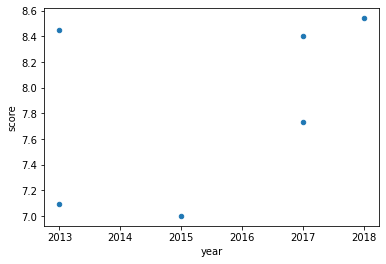

In [21]:
Attack_on_Titan.sort_values("year", ascending=False).plot.scatter(x="year", y="score")